In [72]:
library(dplyr)
library(ggplot2)

In [73]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [74]:
###### actual old results, to replicate

In [75]:
file_old = paste0(mydir, "../new/MOFA/MOFA10/summary_endo_eqtl.csv")
df_old = read.csv(file_old, row.names=1)
nrow(df_old)
head(df_old,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.005333072,16_81118466_A_G,0.005333072
1,ENSG00000011523_CEP68,2,2,0.062120960,2_65279223_C_T,0.124241919


In [76]:
#### new "weird" results to checl/confirm

In [77]:
file_new = paste0(mydir, "../April2021/PCA/PC10/summary.csv")
df_new = read.csv(file_new, row.names=1)
nrow(df_new)
head(df_new,2)

[1] 2250

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000011523_CEP68,2,2,0.30551608,2_65279223_C_T,0.6110322
1,ENSG00000011523_CEP68,2,2,0.09095796,2_65290842_C_A,0.1819159


In [78]:
####### debugging on 100 chromosome 1 genes

In [79]:
list.files(mydir)

[1] "err"                              "genetic_effect"                  
 [3] "mofa_logcounts_model_factors.csv" "mofa_logcounts_model.hdf5"       
 [5] "mofa_weights.csv"                 "MOFA1"                           
 [7] "MOFA10"                           "MOFA2"                           
 [9] "MOFA20"                           "MOFA5"                           
[11] "new0_PCA_same_background.py"      "new1_PCA_diff_background.py"     
[13] "new2_MOFA_diff_background_10.py"  "new2_MOFA_diff_background.py"    
[15] "new3_MOFA_same_background.py"     "new4_MOFA_diff_background_10.py" 
[17] "new4_MOFA_diff_background_2.py"   "new4_MOFA_diff_background_20.py" 
[19] "new4_MOFA_diff_background_5.py"   "new4_MOFA_diff_background.py"    
[21] "new5_MOFA_diff_background.py"     "old_MOFA_diff_background.py"     
[23] "out"                              "PC1"                             
[25] "PC10"                             "run.py"                          
[27] "summarise.py"

In [80]:
####################################################################################
####################################################################################

In [81]:
############## new2
file0 = paste0(mydir, "MOFA10/new2/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.005810689,16_81118466_A_G,0.005810689
1,ENSG00000011523_CEP68,2,2,0.064222761,2_65279223_C_T,0.128445522


In [82]:
#### compare to old 
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new2",".old"))
nrow(df2)

[1] 4470

In [83]:
cor.test(-log10(df2$pv.new2), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new2) and -log10(df2$pv.old)
t = 520.05, df = 4468, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9913500 0.9923037
sample estimates:
      cor 
0.9918407 


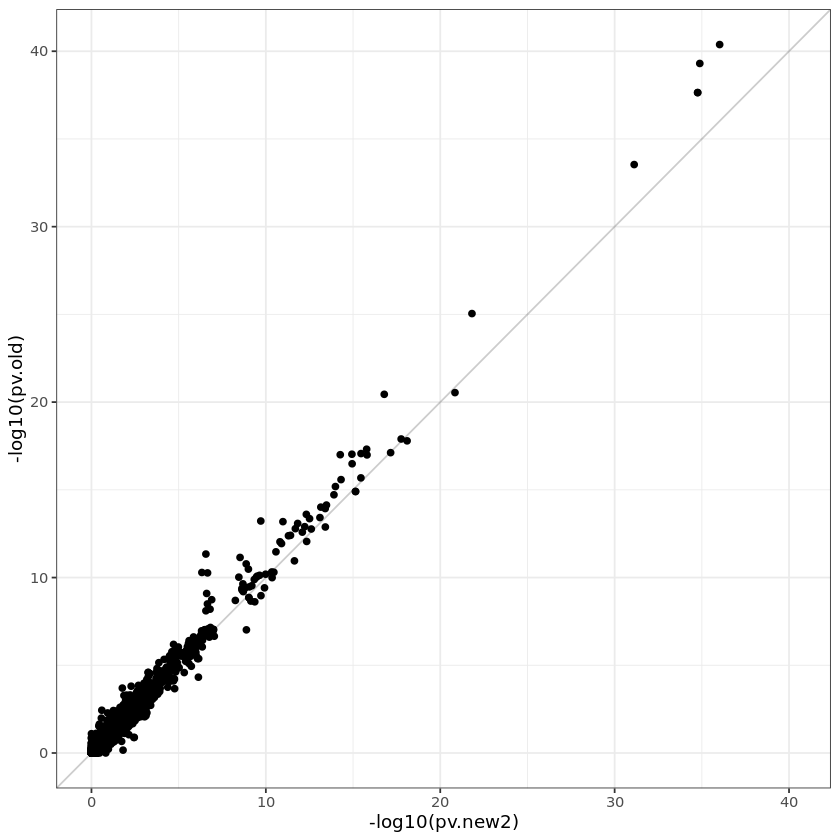

In [84]:
m = -log10(min(min(df2$pv.new2),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new2), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [85]:
####################################################################################
####################################################################################

In [86]:
############## new4
file0 = paste0(mydir, "MOFA10/new4/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.02606257,16_81118466_A_G,0.02606257
1,ENSG00000011523_CEP68,2,2,0.03995225,2_65279223_C_T,0.07990451


In [87]:
#### compare to old 
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new4",".old"))
nrow(df2)

[1] 4470

In [88]:
cor.test(-log10(df2$pv.new4), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new4) and -log10(df2$pv.old)
t = 218.33, df = 4468, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9536061 0.9586349
sample estimates:
     cor 
0.956191 


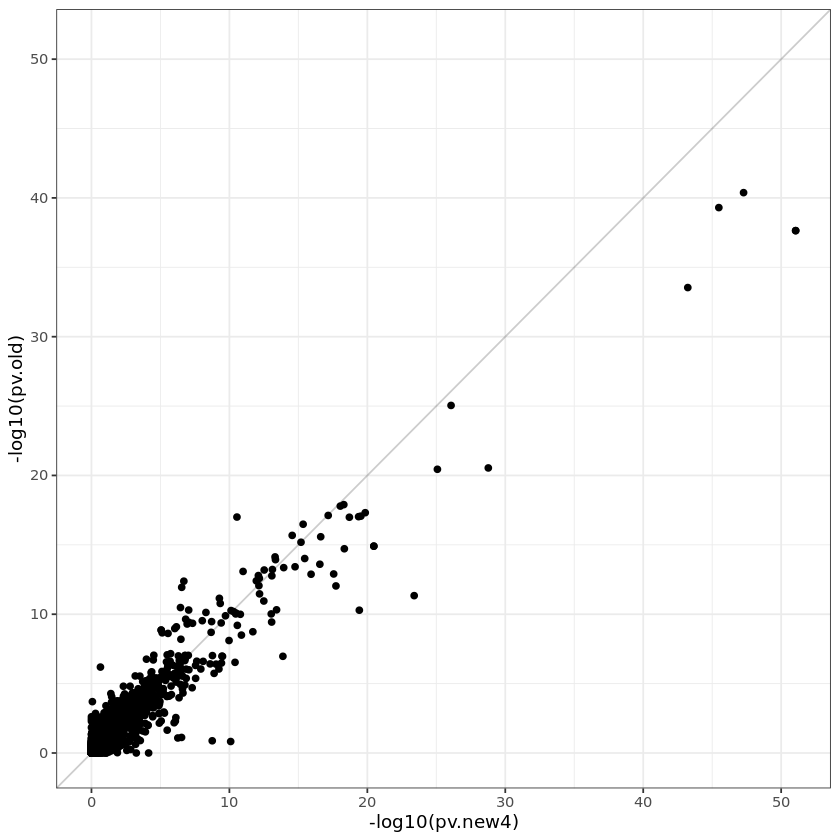

In [89]:
m = -log10(min(min(df2$pv.new4),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new4), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [90]:
library(qvalue)
df0 = df0[order(df0$pv, df0$pv_raw),]
df0 = df0[-which(duplicated(df0$gene)),]
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue

In [91]:
head(df0[df0$qv<0.05,])

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
3483,ENSG00000169877_AHSP,2,16,4.441206e-52,16_31522723_T_C,8.882413e-52,2.877902e-48
207,ENSG00000229150_CRYGEP,2,2,2.649644e-48,2_208977797_G_T,5.299288e-48,8.584846e-45
2295,ENSG00000111913_FAM65B,1,6,5.863853e-44,6_24979164_T_A,5.863853e-44,6.332961e-41
268,ENSG00000243566_UPK3B,1,7,1.700073e-29,7_76137375_C_T,1.700073e-29,1.377059e-26
4051,ENSG00000148291_SURF2,1,9,8.506044e-27,9_136227260_A_G,8.506044e-27,5.511917e-24
2569,ENSG00000179344_HLA-DQB1,1,6,8.324037e-26,6_32634922_A_G,8.324037e-26,4.494980e-23


In [92]:
df0$eqtl = paste0(df0$gene,"-",df0$snpID)
eqtls = df0[df0$qv<0.05,"eqtl"]
length(eqtls)

[1] 322

In [93]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"
endo_GxE_file = paste0(input_files_dir,"endodiff_eqtl_allconditions_FDR10pct_scStructLMM_FDR5pct.csv")
endo_GxE_file

[1] "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/endodiff_eqtl_allconditions_FDR10pct_scStructLMM_FDR5pct.csv"

In [94]:
endo_file = paste0(input_files_dir,"endodiff_eqtl_allconditions_FDR10pct.csv")
endo_df = read.csv(endo_file)
head(endo_df)

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips
12_56401085_G_A,ENSG00000197728_RPS26,ips
17_79634162_T_G,ENSG00000214087_ARL16,ips
6_31486901_T_C,ENSG00000198563_DDX39B,ips
4_39446549_G_A,ENSG00000163682_RPL9,ips


In [95]:
endo_df$eqtl = paste0(endo_df$feature,"-",endo_df$snp_id)
endo_df = endo_df[-which(duplicated(endo_df$eqtl)),]
endo_GxE_df = endo_df[endo_df$eqtl %in% eqtls,]
nrow(endo_GxE_df)
head(endo_GxE_df)

[1] 322

,snp_id,feature,stage,eqtl
3,12_56401085_G_A,ENSG00000197728_RPS26,ips,ENSG00000197728_RPS26-12_56401085_G_A
7,7_72717933_C_T,ENSG00000130305_NSUN5,ips,ENSG00000130305_NSUN5-7_72717933_C_T
13,7_73258087_T_A,ENSG00000165171_WBSCR27,ips,ENSG00000165171_WBSCR27-7_73258087_T_A
14,1_24364016_T_C,ENSG00000189266_PNRC2,ips,ENSG00000189266_PNRC2-1_24364016_T_C
17,8_144676862_C_T,ENSG00000147813_NAPRT1,ips,ENSG00000147813_NAPRT1-8_144676862_C_T
18,19_57939619_C_T,ENSG00000186230_ZNF749,ips,ENSG00000186230_ZNF749-19_57939619_C_T


In [96]:
write.csv(endo_GxE_df, endo_GxE_file, quote = F, row.names=F)